<a href="https://colab.research.google.com/github/NurulIlahiHusnah/Improving-Employee-Retention-by-Predicting-Employee-Attrition-Using-Machine-Learning/blob/master/tugas_4_minipro_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengimport library yang aka digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mengupload data
data = pd.read_excel("/content/drive/MyDrive/Colab tugas 5 Mini Project/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx")
print()
print(data.dtypes)
print()
print(data.shape)
data.head(5)


Username                               object
EnterpriseID                            int64
StatusPernikahan                       object
JenisKelamin                           object
StatusKepegawaian                      object
Pekerjaan                              object
JenjangKarir                           object
PerformancePegawai                     object
AsalDaerah                             object
HiringPlatform                         object
SkorSurveyEngagement                    int64
SkorKepuasanPegawai                   float64
JumlahKeikutsertaanProjek             float64
JumlahKeterlambatanSebulanTerakhir    float64
JumlahKetidakhadiran                  float64
NomorHP                                object
Email                                  object
TingkatPendidikan                      object
PernahBekerja                          object
IkutProgramLOP                        float64
AlasanResign                           object
TanggalLahir                     

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


- Terdapat 287 baris dan 25 kolom,
- Terdapat beberapan type data yang kurang sesuai
- terdapat beberapa kolom yang memiliki missing value

In [ ]:
# melihat jumlah missning value
data_missing = data.isnull().sum()
missing_value = data_missing [data_missing>0]
missing_value

SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
IkutProgramLOP                        258
AlasanResign                           66
dtype: int64

## Mengatasi data null

In [ ]:
# melakukan drop pada kolom yang memiliki missing value diatas 10%
data = data.drop(columns=['IkutProgramLOP'])

#melakukan imputasi pada kolom yang memiliki missing value dibawah 10%
median = data_missing.median()
data = data.fillna(median)

# melakukan pengecekan missing value
data.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

Setelah menghandle data yang missing terdapat kolom yang masih perlu diperhatikan. Untuk kolom tanggal yang memiliki type data object perlu di ubah ke type data date karena terdapat beberapa kolom yg memiliki missing value namun tidak terdetek ketika melakukan imputasi data sebelumnya dikarenakan type data object dimana ' - ' masih memiliki nilai, padahal ini tidak memiliki arti (kosong)

In [ ]:
# merubah type data tanggal
data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])
data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])
data['TanggalPenilaianKaryawan'] = pd.to_datetime(data['TanggalPenilaianKaryawan'])
data['TanggalResign'] = pd.to_datetime(data['TanggalResign'], errors='coerce')


## Mengganti value yang tidak sesuai

In [ ]:
print(data['PernahBekerja'].value_counts())
data['PernahBekerja'] = data['PernahBekerja'].replace('yes',0)
print(data['PernahBekerja'].value_counts())

1      286
yes      1
Name: PernahBekerja, dtype: int64
1    286
0      1
Name: PernahBekerja, dtype: int64


## Membuang data yang tidak diperlukan


In [ ]:
data.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     6
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   23
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           2
AlasanResign                           12
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan              127
TanggalResign                     

setelah melakukan pengecekan tidak terdapat data kolom yang memiliki 1 nilai uniq value

### Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign


In [ ]:
# melihat tanggal mulainya Hiring
awal = data['TanggalHiring'].min()
print('Tanggal Mulai Hiring: ',awal)

akhir =data['TanggalHiring'].max()
print('Tanggal Akhir Hiring: ',akhir)

Tanggal Mulai Hiring:  2006-01-09 00:00:00
Tanggal Akhir Hiring:  2018-07-09 00:00:00


In [ ]:
# menampilan detail jumlah karyawan resign berdasatkan tanggal
Hiring_Berdasatkan_Tanggal= data.groupby('TanggalHiring').agg({'EnterpriseID' : 'count'})
Hiring_Berdasatkan_Tanggal = Hiring_Berdasatkan_Tanggal.add_suffix('_Count').reset_index()

# menampilkan tanggal yang jumlah karyawan risegn tertinggi
print(Hiring_Berdasatkan_Tanggal[Hiring_Berdasatkan_Tanggal['EnterpriseID_Count']==Hiring_Berdasatkan_Tanggal['EnterpriseID_Count'].max()])
Hiring_Berdasatkan_Tanggal

   TanggalHiring  EnterpriseID_Count
16    2011-01-10                  12


,TanggalHiring,EnterpriseID_Count
0,2006-01-09,1
1,2007-06-25,1
2,2007-11-05,1
3,2008-01-07,1
4,2008-10-27,1
5,2009-01-05,3
6,2009-01-08,1
7,2009-04-27,1
8,2009-07-06,1
9,2009-10-26,1


In [ ]:
# melihat tanggal mulainya Resign
awal = data['TanggalResign'].min()
print('Tanggal Mulai Resign: ',awal)

akhir =data['TanggalResign'].max()
print('Tanggal Akhir Resign: ',akhir)

Tanggal Mulai Resign:  2013-05-30 00:00:00
Tanggal Akhir Resign:  2020-09-27 00:00:00


In [ ]:
# menampilan detail jumlah karyawan resign berdasatkan tanggal
Resign_Berdasatkan_Tanggal= data.groupby('TanggalResign').agg({'EnterpriseID' : 'count'})
Resign_Berdasatkan_Tanggal = Resign_Berdasatkan_Tanggal.add_suffix('_Count').reset_index()

# menampilkan tanggal yang jumlah karyawan risegn tertinggi
print(Resign_Berdasatkan_Tanggal[Resign_Berdasatkan_Tanggal['EnterpriseID_Count']==Resign_Berdasatkan_Tanggal['EnterpriseID_Count'].max()])
Resign_Berdasatkan_Tanggal

   TanggalResign  EnterpriseID_Count
3     2014-08-19                   9
29    2017-11-15                   9
33    2018-04-01                   9
35    2018-06-08                   9


,TanggalResign,EnterpriseID_Count
0,2013-05-30,4
1,2013-09-26,1
2,2014-04-07,1
3,2014-08-19,9
4,2014-09-24,2
5,2015-01-07,1
6,2015-01-09,1
7,2015-04-01,1
8,2015-04-15,1
9,2015-06-05,1


In [ ]:
# Menghitung jumlah karyawan yang masuk berdasarkan tahun hiring
jumlah_masuk = data.groupby(data['TanggalHiring'].dt.year)['EnterpriseID'].count()


# Menghitung jumlah karyawan yang keluar berdasarkan tahun resign
jumlah_keluar = data.groupby(data['TanggalResign'].dt.year)['EnterpriseID'].count()


# Menampilkan tabel agregat jumlah masuk
print("Tabel Agregat Jumlah Karyawan Masuk:")
print(jumlah_masuk)

# Menampilkan tabel agregat jumlah keluar
print("\nTabel Agregat Jumlah Karyawan Keluar:")
print(jumlah_keluar)

Tabel Agregat Jumlah Karyawan Masuk:
TanggalHiring
2006     1
2007     2
2008     2
2009     7
2010     8
2011    76
2012    41
2013    43
2014    56
2015    31
2016    14
2017     5
2018     1
Name: EnterpriseID, dtype: int64

Tabel Agregat Jumlah Karyawan Keluar:
TanggalResign
2013.0     5
2014.0    12
2015.0     8
2016.0     8
2017.0    19
2018.0    26
2019.0     5
2020.0     6
Name: EnterpriseID, dtype: int64


Kesimpulan dari analisa diatas awal mulai **Hiring dimulai dari tahun 2006 - 2018**. <br>
Lalu mulainya karyawan meilih untuk **Risegn ditahun 2013 - 2020**. <br>

Detail berdasarkan bulan :     
- Dilakukan pengecekan lebih dalam terlihat jumlah karyawan yang memilih untuk **Risegn terbanyak ada pada tahun 2018** sebanyak 2 kali di bulan **( April - Juni)**  berbeda dengan total dari 2 bulan tersebut **sebesar 18 orang**.  
- Untuk jumlah Hiring terbanyak terjadi di tahun **2011 di bulan Januari sebesar 12 orang**.<br>
<br>
Detail berdasarkan tahun :
- Untuk data **Hiring 3 teratas terjadi ditahun 2011, 2014 dan 2013**.
- Untuk data **Risegn 3 teratas ada ditahun 2018, 2017 dan 2014**.

   

### Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh

In [ ]:
data_gabung = jumlah_masuk.to_frame(name='Jumlah Masuk').join(jumlah_keluar.to_frame(name= 'Jumlah Keluar'), how='outer')
print(data_gabung)


        Jumlah Masuk  Jumlah Keluar
2006.0           1.0            NaN
2007.0           2.0            NaN
2008.0           2.0            NaN
2009.0           7.0            NaN
2010.0           8.0            NaN
2011.0          76.0            NaN
2012.0          41.0            NaN
2013.0          43.0            5.0
2014.0          56.0           12.0
2015.0          31.0            8.0
2016.0          14.0            8.0
2017.0           5.0           19.0
2018.0           1.0           26.0
2019.0           NaN            5.0
2020.0           NaN            6.0


### Lakukan imputation pada data tahun yang kosong sesuai urutan

In [ ]:
data_gabung=data_gabung.fillna(0)
data_gabung

,Jumlah Masuk,Jumlah Keluar
2006.0,1.0,0.0
2007.0,2.0,0.0
2008.0,2.0,0.0
2009.0,7.0,0.0
2010.0,8.0,0.0
2011.0,76.0,0.0
2012.0,41.0,0.0
2013.0,43.0,5.0
2014.0,56.0,12.0
2015.0,31.0,8.0


### Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari tabel hasil join pada tahap dua (2)

In [ ]:
# berikut adalah jumlah karyawan yang masih tersisa
data_gabung['Jumlah karyawan bertahan'] =data_gabung['Jumlah Masuk'] - data_gabung['Jumlah Keluar']
print(data_gabung)

        Jumlah Masuk  Jumlah Keluar  Jumlah karyawan bertahan
2006.0           1.0            0.0                       1.0
2007.0           2.0            0.0                       2.0
2008.0           2.0            0.0                       2.0
2009.0           7.0            0.0                       7.0
2010.0           8.0            0.0                       8.0
2011.0          76.0            0.0                      76.0
2012.0          41.0            0.0                      41.0
2013.0          43.0            5.0                      38.0
2014.0          56.0           12.0                      44.0
2015.0          31.0            8.0                      23.0
2016.0          14.0            8.0                       6.0
2017.0           5.0           19.0                     -14.0
2018.0           1.0           26.0                     -25.0
2019.0           0.0            5.0                      -5.0
2020.0           0.0            6.0                      -6.0


### Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada

In [ ]:
tahun = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
data_gabung = pd.DataFrame(data_gabung, index=tahun)
data_gabung.index.name ='Tahun'
data_gabung

,Jumlah Masuk,Jumlah Keluar,Jumlah karyawan bertahan
Tahun,,,
2006,1.0,0.0,1.0
2007,2.0,0.0,2.0
2008,2.0,0.0,2.0
2009,7.0,0.0,7.0
2010,8.0,0.0,8.0
2011,76.0,0.0,76.0
2012,41.0,0.0,41.0
2013,43.0,5.0,38.0
2014,56.0,12.0,44.0


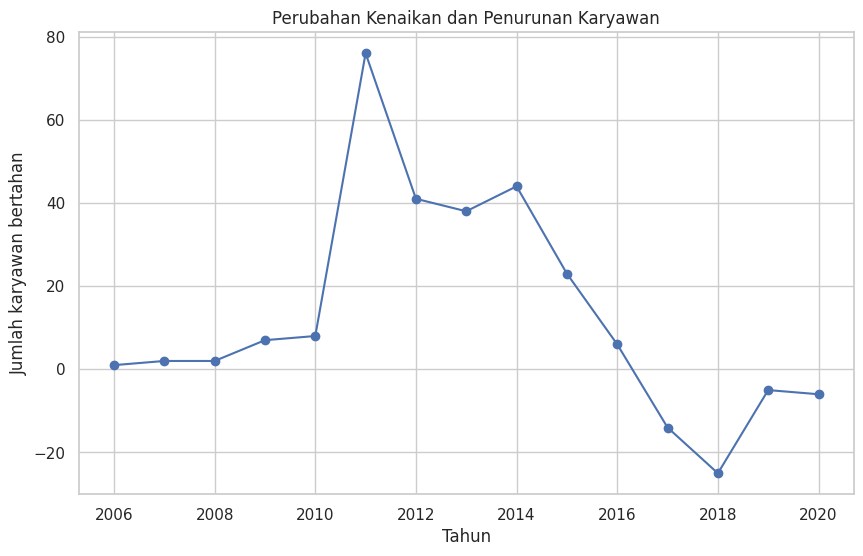

In [ ]:

# Visualisasi Time Series menggunakan line chart
plt.figure(figsize=(10, 6))
plt.plot(data_gabung.index, data_gabung['Jumlah karyawan bertahan'], marker='o', linestyle='-', color='b')
plt.xlabel('Tahun')
plt.ylabel('Jumlah karyawan bertahan')
plt.title('Perubahan Kenaikan dan Penurunan Karyawan')
plt.grid(True)

# Menampilkan Grafik
plt.show()







In [ ]:
# melakukan visualisasi menggunakan Waterfall
import plotly.graph_objects as go
fig2 = go.Figure(go.Waterfall(
name = 'EnterpriseID', orientation= "v",
x = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"],
textposition='auto',
text =['1','2','2','7','8','76','41','38','44','23','6','-14','-25','-5','-6'],
y = [1, 2, 2, 7, 8, 76, 4, 1, 38, 44, 23, 6, -14, -25, -5, -6],
connector ={"line":{"color":"#b20710"}},
increasing = {"marker":{"color":"#b20710"}},
decreasing = {"marker":{"color":"orange"}},
))

fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False, visible=False)
fig2.update_traces(hovertemplate=None)
fig2.update_layout(title='Perubahan Kenaikan dan Penurunan Karyawan', height=350,
                   margin=dict(t=80, b=20, l=50, r=50),
                   hovermode="x unified",
                   xaxis_title=' ', yaxis_title=" ",
                   plot_bgcolor='#333', paper_bgcolor='#333',
                   title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                   font=dict(color='#8a8d93'))

In [ ]:
!pip install waterfall_chart

ERROR: Could not find a version that satisfies the requirement waterfall_chart (from versions: none)
ERROR: No matching distribution found for waterfall_chart


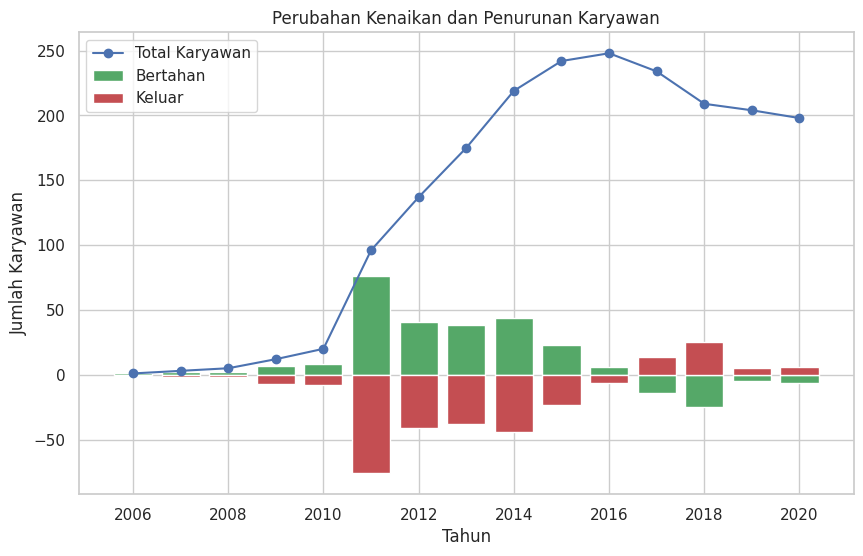

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
bertahan = [1, 2, 2, 7, 8, 76, 41, 38, 44, 23, 6, -14, -25, -5, -6]

# Calculate cumulative sum
cumulative = [sum(bertahan[:i+1]) for i in range(len(bertahan))]

# Create waterfall chart
plt.figure(figsize=(10, 6))
plt.bar(years, bertahan, color='g', label='Bertahan')
plt.bar(years, [-x for x in bertahan], color='r', label='Keluar')
plt.plot(years, cumulative, marker='o', linestyle='-', color='b', label='Total Karyawan')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.title('Perubahan Kenaikan dan Penurunan Karyawan')
plt.legend()
plt.grid(True)

plt.show()


## Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign
Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum




In [ ]:
# merubah data yang kurang tepat
data['Keterangan_risegn'] = data['TanggalResign'].apply (lambda x: 0 if pd.isna(x) else 1)
data[['Keterangan_risegn','TanggalResign']]. sample(5)

,Keterangan_risegn,TanggalResign
212,1,2018-06-08
232,0,NaT
79,0,NaT
140,0,NaT
137,1,2014-09-24


In [ ]:
# melihat jumlah karyawan yang risegn berdasarkan jenis pekerjaannya
Data_risegn = data[data['Keterangan_risegn']==1].groupby('Pekerjaan').size().reset_index(name = 'Jumlah_risegn')
Data_tidak_risegn = data[data['Keterangan_risegn']==0].groupby('Pekerjaan').size().reset_index(name = 'Jumlah_tidak_risegn')
print(Data_risegn)
print()
print(Data_tidak_risegn)

                       Pekerjaan  Jumlah_risegn
0                   Data Analyst              8
1                  Data Engineer              3
2       Product Design (UI & UX)              9
3                Product Manager              6
4    Software Engineer (Android)              7
5   Software Engineer (Back End)             28
6  Software Engineer (Front End)             28

                         Pekerjaan  Jumlah_tidak_risegn
0                     Data Analyst                    8
1                    Data Engineer                    7
2                  DevOps Engineer                    3
3          Digital Product Manager                    2
4        Machine Learning Engineer                    2
5         Product Design (UI & UX)                   15
6   Product Design (UX Researcher)                    1
7                  Product Manager                   11
8                     Scrum Master                    3
9               Software Architect                    1

## Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan
Hint: Gunakan outer join

In [ ]:
data_gabungan = pd.merge(Data_tidak_risegn, Data_risegn, on='Pekerjaan', how= 'outer')
print(data_gabungan[data_gabungan['Jumlah_risegn']== data_gabungan['Jumlah_risegn'].max()])
data_gabungan

                        Pekerjaan  Jumlah_tidak_risegn  Jumlah_risegn
11   Software Engineer (Back End)                   81           28.0
12  Software Engineer (Front End)                   44           28.0


,Pekerjaan,Jumlah_tidak_risegn,Jumlah_risegn
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,NaN
3,Digital Product Manager,2,NaN
4,Machine Learning Engineer,2,NaN
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,NaN
7,Product Manager,11,6.0
8,Scrum Master,3,NaN
9,Software Architect,1,NaN


Untuk jenis pekerjaan yang memiliki tingkat troubel yang tinggi banyak diantara karyawan lebih memilih untuk mengundurkan diri dibanding bertahan.

In [ ]:
# merubah value yang kurang sesuai untuk dilakukan analisa lebih lanjut
data_gabungan['Jumlah_risegn'].value_counts().sum()

7

In [ ]:
data_gabungan['Jumlah_risegn'].fillna(0, inplace=True)
data_gabungan

,Pekerjaan,Jumlah_tidak_risegn,Jumlah_risegn
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


## Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign)
Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee

In [ ]:
data_gabungan['jumlah_employee']= data_gabungan['Jumlah_tidak_risegn'] + data_gabungan['Jumlah_risegn']
data_gabungan['Persentase_jumlah_aktif']= (data_gabungan['Jumlah_tidak_risegn'] / len(data))*100
data_gabungan

,Pekerjaan,Jumlah_tidak_risegn,Jumlah_risegn,jumlah_employee,Persentase_jumlah_aktif
0,Data Analyst,8,8.0,16.0,2.787456
1,Data Engineer,7,3.0,10.0,2.439024
2,DevOps Engineer,3,0.0,3.0,1.045296
3,Digital Product Manager,2,0.0,2.0,0.696864
4,Machine Learning Engineer,2,0.0,2.0,0.696864
5,Product Design (UI & UX),15,9.0,24.0,5.226481
6,Product Design (UX Researcher),1,0.0,1.0,0.348432
7,Product Manager,11,6.0,17.0,3.832753
8,Scrum Master,3,0.0,3.0,1.045296
9,Software Architect,1,0.0,1.0,0.348432


## Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya
Hint: Perhatikan jenis plot yang digunakan

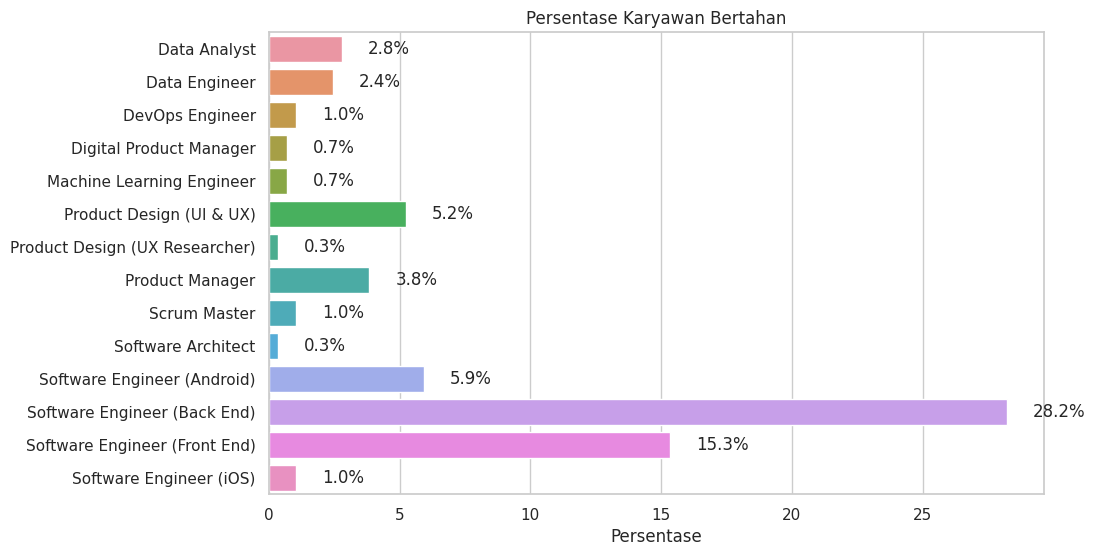

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

df= data_gabungan[['Pekerjaan','Persentase_jumlah_aktif']]
ax = sns.barplot(df,y='Pekerjaan',x='Persentase_jumlah_aktif',orient='h')

# Menambahkan tulisan persentase di atas batang
for i, Persentase_jumlah_aktif in enumerate(df.Persentase_jumlah_aktif):
    ax.text(Persentase_jumlah_aktif + 1, i, f'{Persentase_jumlah_aktif:.1f}%', va='center')

plt.ylabel("")
plt.xlabel("Persentase")
plt.title ('Persentase Karyawan Bertahan')
plt.show()



In [ ]:
data_gabungan['Persentase_risegn'] =(data_gabungan['Jumlah_risegn']/ len(data)) *100
dgr = data_gabungan[data_gabungan['Persentase_risegn']== data_gabungan['Persentase_risegn'].max()]
print('Berikut Nilai persentase tertinggi : \n \n', dgr)
print('---------------------------------------------------------------------------')
dgt= data_gabungan[data_gabungan['Jumlah_tidak_risegn']== data_gabungan['Jumlah_tidak_risegn'].max()]
print('Berikut Nilai persentase tertinggi : \n \n', dgr)

Berikut Nilai persentase tertinggi : 
 
                         Pekerjaan  Jumlah_tidak_risegn  Jumlah_risegn  \
11   Software Engineer (Back End)                   81           28.0   
12  Software Engineer (Front End)                   44           28.0   

    jumlah_employee  Persentase_jumlah_aktif  Persentase_risegn  
11            109.0                28.222997           9.756098  
12             72.0                15.331010           9.756098  
---------------------------------------------------------------------------
Berikut Nilai persentase tertinggi : 
 
                         Pekerjaan  Jumlah_tidak_risegn  Jumlah_risegn  \
11   Software Engineer (Back End)                   81           28.0   
12  Software Engineer (Front End)                   44           28.0   

    jumlah_employee  Persentase_jumlah_aktif  Persentase_risegn  
11            109.0                28.222997           9.756098  
12             72.0                15.331010           9.756098  


## Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat

In [ ]:
df_risegn = data[data['Keterangan_risegn']==1].reset_index()
df_tidak_risegn = data[data['Keterangan_risegn']==0].reset_index()
df_risegn.sample(5)

,index,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Keterangan_risegn
24,93,gloomyClam6,100919,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Timur,...,+6285908172xxx,gloomyClam6755@gmail.com,Doktor,1,jam_kerja,1988-09-14,2014-08-18,2020-01-30,2015-06-24,1
61,201,insecureIcecream8,100620,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Timur,...,+6289797498xxx,insecureIcecream8676@yahoo.com,Magister,1,jam_kerja,1951-02-25,2011-04-04,2016-05-06,2017-11-15,1
48,161,needfulZebra5,111703,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,...,+6285507346xxx,needfulZebra5962@gmail.com,Sarjana,1,tidak_bisa_remote,1983-06-14,2013-02-18,2018-02-12,2015-04-15,1
53,175,giddyMandrill6,101274,Menikah,Pria,FullTime,Product Design (UI & UX),Mid_level,Biasa,Jakarta Utara,...,+6281272430xxx,giddyMandrill6475@gmail.com,Sarjana,1,jam_kerja,1983-03-28,2013-04-01,2017-03-06,2019-09-26,1
22,86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,...,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,1,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,1


In [ ]:
# memperbaiki missing value
df_tidak_risegn['AlasanResign']=df_tidak_risegn['AlasanResign'].replace(0.0,'Null')
df_tidak_risegn['AlasanResign'].value_counts()

masih_bekerja    132
Null              66
Name: AlasanResign, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
detail_risegn = df_risegn.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).agg({'EnterpriseID': 'count'})
detail_risegn = detail_risegn.rename(columns={'EnterpriseID':'Jumlah'})
detail_risegn.reset_index()
detail_risegn

Jumlah
JenjangKarir          PerformancePegawai AlasanResign                    
Freshgraduate_program Bagus              ganti_karir                    3
                                         jam_kerja                      3
                                         kejelasan_karir                1
                                         leadership                     2
                                         tidak_bisa_remote              1
                                         toxic_culture                  2
                      Biasa              apresiasi                      1
                                         ganti_karir                    3
                                         internal_conflict              1
                                         jam_kerja                      2
                                         kejelasan_karir                2
                                         leadership                     2
                                         tidak_bahagia                  1
                                         tidak_bisa_remote              2
                                         toxic_culture                  1
                      Kurang             ganti_karir                    1
                                         jam_kerja                      1
                                         tidak_bahagia                  1
                      Sangat_bagus       Product Design (UI & UX)       2
                                         apresiasi                      1
                                         internal_conflict              1
                                         leadership                     2
                                         tidak_bahagia                  1
                                         tidak_bisa_remote              5
                                         toxic_culture                  3
                      Sangat_kurang      ganti_karir                    1
                                         jam_kerja                      1
                                         kejelasan_karir                2
                                         toxic_culture                  1
Mid_level             Bagus              kejelasan_karir                1
                                         leadership                     1
                      Biasa              ganti_karir                    1
                                         jam_kerja                      3
                                         kejelasan_karir                1
                                         tidak_bisa_remote              1
                      Kurang             ganti_karir                    2
                                         tidak_bahagia                  1
                      Sangat_bagus       Product Design (UI & UX)       1
                                         ganti_karir                    1
                                         internal_conflict              1
                                         jam_kerja                      2
                                         kejelasan_karir                2
                                         leadership                     1
                                         tidak_bisa_remote              2
                      Sangat_kurang      jam_kerja                      2
Senior_level          Bagus              ganti_karir                    1
                                         tidak_bahagia                  2
                      Biasa              Product Design (UI & UX)       1
                                         ganti_karir                    1
                                         internal_conflict              1
                                         jam_kerja                      1
                                         kejelasan_karir                1
                      Kurang             leadership                    

In [ ]:
 detail_risegn[detail_risegn['Jumlah']==detail_risegn['Jumlah'].max()]

,,,Jumlah
JenjangKarir,PerformancePegawai,AlasanResign,
Freshgraduate_program,Sangat_bagus,tidak_bisa_remote,5


## Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya
Hint: Perhatikan jenis plot yang digunakan


In [ ]:
type(detail_risegn)
detail_risegn.index
detail_risegn = detail_risegn.add_suffix('_Count').reset_index()
detail_risegn

,JenjangKarir,PerformancePegawai,AlasanResign,Jumlah_Count
0,Freshgraduate_program,Bagus,ganti_karir,3
1,Freshgraduate_program,Bagus,jam_kerja,3
2,Freshgraduate_program,Bagus,kejelasan_karir,1
3,Freshgraduate_program,Bagus,leadership,2
4,Freshgraduate_program,Bagus,tidak_bisa_remote,1
5,Freshgraduate_program,Bagus,toxic_culture,2
6,Freshgraduate_program,Biasa,apresiasi,1
7,Freshgraduate_program,Biasa,ganti_karir,3
8,Freshgraduate_program,Biasa,internal_conflict,1
9,Freshgraduate_program,Biasa,jam_kerja,2


In [ ]:
detail_risegn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   JenjangKarir        59 non-null     object
 1   PerformancePegawai  59 non-null     object
 2   AlasanResign        59 non-null     object
 3   Jumlah_Count        59 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


<Figure size 1200x800 with 0 Axes>

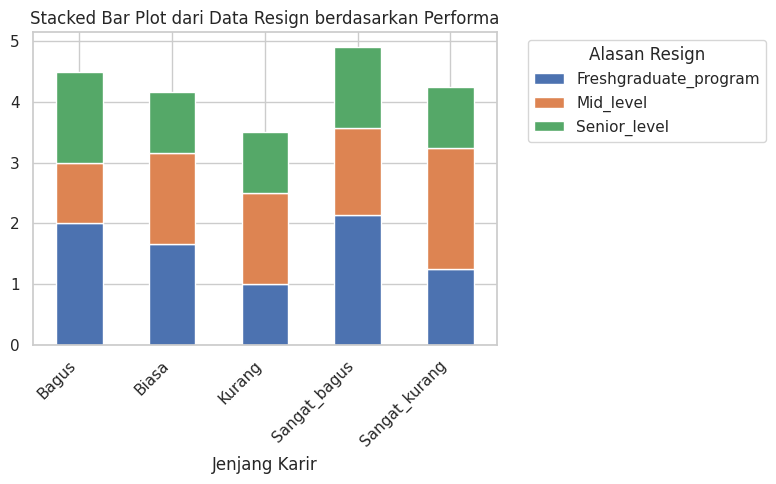

In [ ]:
# Ubah data frame ke dalam bentuk yang sesuai
pivot_data1 = detail_risegn.pivot_table(index='PerformancePegawai', columns=['JenjangKarir'], values='Jumlah_Count', fill_value=0)

# Tampilkan 10 baris pertama dari data yang sudah diubah
pivot_data1.head(5)

plt.figure(figsize=(12, 8))
pivot_data1.plot(kind='bar', stacked=True)
plt.xlabel('Jenjang Karir')
plt.ylabel('')
plt.title('Stacked Bar Plot dari Data Resign berdasarkan Performa')
plt.legend(title='Alasan Resign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


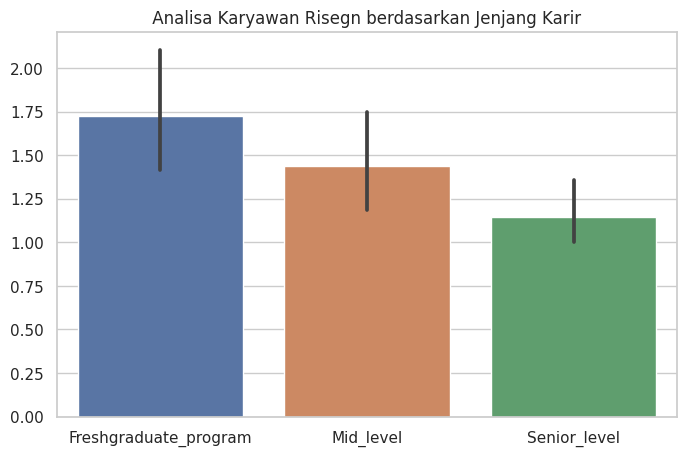

In [ ]:
sns.barplot(x='JenjangKarir', y= 'Jumlah_Count',data=detail_risegn)
plt.title(' Analisa Karyawan Risegn berdasarkan Jenjang Karir ')
plt.xlabel('')
plt.ylabel('')

plt.show()


In [ ]:
detail_risegn.groupby('AlasanResign').agg({'Jumlah_Count':'sum'})

,Jumlah_Count
AlasanResign,
Product Design (UI & UX),4
apresiasi,2
ganti_karir,14
internal_conflict,4
jam_kerja,16
kejelasan_karir,11
leadership,9
tidak_bahagia,8
tidak_bisa_remote,11


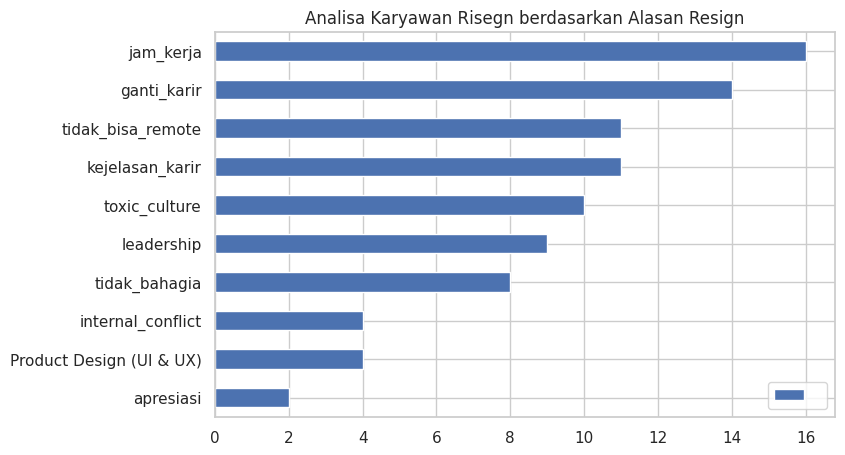

In [ ]:
# Membuat figure
plt.rcParams['figure.figsize'] = (8, 5)# Ukuran figure: lebar x tinggi

# Kodingan Anda
df = detail_risegn.groupby('AlasanResign').agg({'Jumlah_Count':'sum'})
df = df.sort_values(by='Jumlah_Count', ascending=True)

# Membuat bar plot horizontal
df.plot(kind='barh')
plt.title('Analisa Karyawan Risegn berdasarkan Alasan Resign')
plt.xlabel('')
plt.legend(' ')
plt.ylabel('')

plt.show()




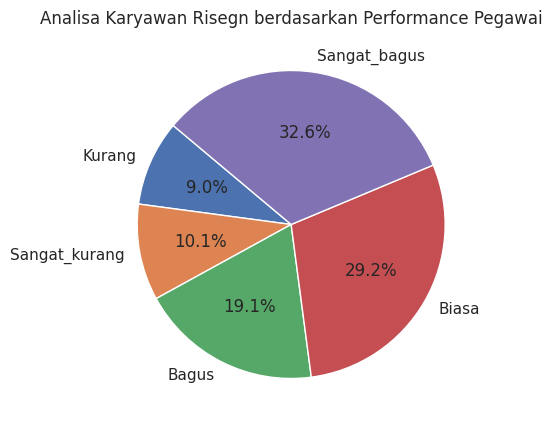

In [ ]:
# Membuat figure
plt.rcParams['figure.figsize'] = (8, 5)# Ukuran figure: lebar x tinggi

# Kodingan Anda
df_per = detail_risegn.groupby('PerformancePegawai').agg({'Jumlah_Count':'sum'})
df_per = df_per.sort_values(by='Jumlah_Count', ascending=True)

# Membuat bar plot horizontal
plt.pie(df_per['Jumlah_Count'], labels=df_per.index, autopct='%1.1f%%', startangle=140)
plt.title('Analisa Karyawan Risegn berdasarkan Performance Pegawai')
plt.show()



### Perusahaan ingin membangun sebuah sistem pendeteksi otomatis tentang keinginan resign dari karyawan yang ada di perusahaan

## Deteksi Missing Value

In [ ]:
# cross cek data duplikat
print('Jumlah data duplikat :',data.duplicated().sum())
print('\n')
# cross cek missing data
print(data.isnull().sum())
print('\n')
# cross cek info dataset
print(data.info())

Jumlah data duplikat : 0


Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
Tanggal

## Deteksi Pencilan

In [ ]:
def count_outliers(column):
    if column.dtype.kind in ['i', 'f']:
        q1 = np.percentile(column, 25)
        q3 = np.percentile(column, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return len(outliers)
    else:
        return 0

def calculate_outlier_percentage(column):
    total_data = len(column)
    outliers = count_outliers(column)
    percentage = (outliers / total_data) * 100
    return percentage

outlier_counts = data.apply(count_outliers)
outlier_percentages = data.apply(calculate_outlier_percentage)

print("Jumlah Outlier:")
print(outlier_counts)
print("\nPersentase Outlier:")
print(outlier_percentages)


Jumlah Outlier:
Username                               0
EnterpriseID                           0
StatusPernikahan                       0
JenisKelamin                           0
StatusKepegawaian                      0
Pekerjaan                              0
JenjangKarir                           0
PerformancePegawai                     0
AsalDaerah                             0
HiringPlatform                         0
SkorSurveyEngagement                  14
SkorKepuasanPegawai                    0
JumlahKeikutsertaanProjek             63
JumlahKeterlambatanSebulanTerakhir    31
JumlahKetidakhadiran                   2
NomorHP                                0
Email                                  0
TingkatPendidikan                      0
PernahBekerja                          1
AlasanResign                           0
TanggalLahir                           0
TanggalHiring                          0
TanggalPenilaianKaryawan               0
TanggalResign                          0


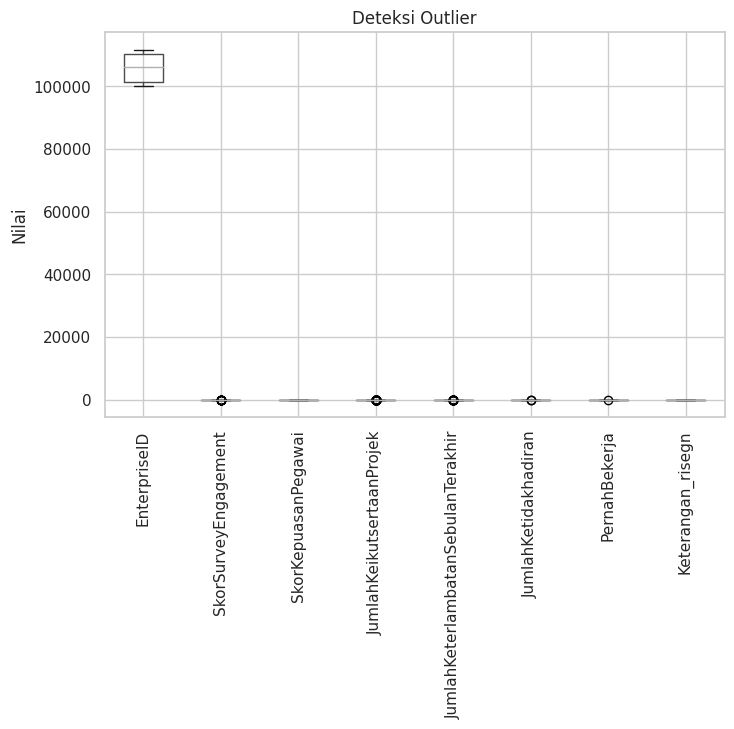

In [ ]:
plt.figure(figsize=(8,5))
data.boxplot()
plt.title('Deteksi Outlier')
plt.ylabel('Nilai')
plt.xticks(rotation ='vertical')
plt.show()

## Feature selection manual

In [ ]:
df = data[['StatusKepegawaian','JenjangKarir','PerformancePegawai','HiringPlatform','SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','Keterangan_risegn']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusKepegawaian                   287 non-null    object 
 1   JenjangKarir                        287 non-null    object 
 2   PerformancePegawai                  287 non-null    object 
 3   HiringPlatform                      287 non-null    object 
 4   SkorSurveyEngagement                287 non-null    int64  
 5   SkorKepuasanPegawai                 287 non-null    float64
 6   JumlahKeikutsertaanProjek           287 non-null    float64
 7   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 8   JumlahKetidakhadiran                287 non-null    float64
 9   Keterangan_risegn                   287 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 22.5+ KB


## Feature Transformation
Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

kolom_float = df.select_dtypes(include=['float']).columns # merubah yang brtype float saja

scaler_df = df.copy()
scaler_df[kolom_float] = scalar.fit_transform(data[kolom_float])
scaler_df['SkorSurveyEngagement'] = scalar.fit_transform(scaler_df['SkorSurveyEngagement'].values.reshape(-1, 1))
scaler_df.head()

,StatusKepegawaian,JenjangKarir,PerformancePegawai,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,Keterangan_risegn
0,Outsource,Freshgraduate_program,Sangat_bagus,Employee_Referral,1.076684,0.157748,-0.511602,-0.323537,-0.176225,0
1,FullTime,Freshgraduate_program,Sangat_kurang,Website,1.076684,0.157748,1.241590,-0.323537,-1.035883,1
2,FullTime,Freshgraduate_program,Bagus,Indeed,1.076684,-0.805523,-0.511602,-0.323537,0.110328,1
3,Outsource,Freshgraduate_program,Bagus,LinkedIn,-0.121023,-0.805523,-0.511602,2.824091,-0.606054,0
4,FullTime,Freshgraduate_program,Bagus,LinkedIn,-0.121023,-0.805523,-0.511602,-0.323537,0.110328,1


## Feature Engineering
Label encoder pada dataset baru


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in scaler_df.select_dtypes(include=['object']).columns:
  scaler_df[col +'_encoded'] = label.fit_transform(scaler_df[col])


scaler_df =scaler_df.drop(columns=df.select_dtypes(include=['object']))# drop data bertype object yang sudah di label encoder
scaler_df.sample(3)


,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,Keterangan_risegn,StatusKepegawaian_encoded,JenjangKarir_encoded,PerformancePegawai_encoded,HiringPlatform_encoded
47,1.076684,-0.805523,-0.511602,-0.323537,-0.606054,0,0,2,0,8
217,-1.318729,-1.768795,-0.511602,2.037184,-0.749330,0,0,0,1,8
18,-0.121023,0.157748,-0.511602,-0.323537,0.969986,1,0,0,3,1


## Split Test

In [ ]:
import time
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split

from sklearn.pipeline import Pipeline

from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier


from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
X = scaler_df.drop(columns=['Keterangan_risegn'])
y= scaler_df['Keterangan_risegn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=100)


In [ ]:
print('data train X:')
print(X_train.sample(2))
print('-----------------------------------------------------------------------------')
print('data test X: ')
print(X_test.sample(2))

data train X:
     SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
207              1.076684            -0.805523                   1.679889   
150             -2.516435            -1.768795                  -0.073304   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran  \
207                           -0.323537              0.969986   
150                            4.397905              1.399815   

     StatusKepegawaian_encoded  JenjangKarir_encoded  \
207                          0                     1   
150                          0                     2   

     PerformancePegawai_encoded  HiringPlatform_encoded  
207                           3                       4  
150                           1                       4  
-----------------------------------------------------------------------------
data test X: 
     SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
200             -0.121023             0.157748

In [ ]:
data['Keterangan_risegn'].value_counts()

## Handle Imbalance

In [212]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_train.shape)
print(X_train_oversampled.shape)
print(y_train_oversampled.shape)

y_train_oversampled.value_counts()

(200, 9)
(200, 9)
(270, 9)
(270,)


0    135
1    135
Name: Keterangan_risegn, dtype: int64

## Permodelan

### Logistik regresion

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error

logistic = LogisticRegression()
logistic.fit(X_train_oversampled, y_train_oversampled)

y_pred = logistic.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(logistic, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))


print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.6091954022988506

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        63
           1       0.35      0.50      0.41        24

    accuracy                           0.61        87
   macro avg       0.56      0.58      0.56        87
weighted avg       0.66      0.61      0.63        87


Average 5-Fold Cv Score: 0.662 , Standard deviation: 0.014
---------------------------------------------------------------------
RMSE : 0.6251436616499838
MAE:  0.39080459770114945
R2 : -0.9563492063492067
MAPE : 1138841285082194.5


## Decision Tree Classifier

In [214]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth= 3, min_samples_leaf=5)
ds.fit(X_train_oversampled, y_train_oversampled)

y_pred = ds.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(ds, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))


print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.4827586206896552

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        63
           1       0.29      0.62      0.40        24

    accuracy                           0.48        87
   macro avg       0.52      0.53      0.47        87
weighted avg       0.62      0.48      0.51        87


Average 5-Fold Cv Score: 0.6238 , Standard deviation: 0.058
---------------------------------------------------------------------
RMSE : 0.7191949522280763
MAE:  0.5172413793103449
R2 : -1.5892857142857149
MAPE : 1863558466498136.2


## Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
rf = RandomForestClassifier(criterion="gini", n_estimators=100)
rf.fit(X_train_oversampled, y_train_oversampled)
y_pred = rf.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(rf, X, y, cv=3)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.6666666666666666

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        63
           1       0.40      0.42      0.41        24

    accuracy                           0.67        87
   macro avg       0.59      0.59      0.59        87
weighted avg       0.67      0.67      0.67        87


Average 5-Fold Cv Score: 0.6376 , Standard deviation: 0.006
---------------------------------------------------------------------
RMSE : 0.5773502691896257
MAE:  0.3333333333333333
R2 : -0.6686507936507939
MAPE : 776482694374223.5


## K Nearest Neighbor

In [216]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, weights='distance',metric='manhattan')

knn.fit(X_train_oversampled, y_train_oversampled)
y_pred = knn.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(knn, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.5747126436781609

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        63
           1       0.29      0.38      0.33        24

    accuracy                           0.57        87
   macro avg       0.51      0.51      0.51        87
weighted avg       0.61      0.57      0.59        87


Average 5-Fold Cv Score: 0.5992 , Standard deviation: 0.0593
---------------------------------------------------------------------
RMSE : 0.6521405955174383
MAE:  0.42528735632183906
R2 : -1.1289682539682544
MAPE : 1138841285082194.5


## Pseudo KNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, weights='uniform',metric='manhattan')

knn.fit(X_train_oversampled, y_train_oversampled)
y_pred = knn.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(knn, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.5517241379310345

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        63
           1       0.27      0.38      0.32        24

    accuracy                           0.55        87
   macro avg       0.50      0.50      0.49        87
weighted avg       0.60      0.55      0.57        87


Average 5-Fold Cv Score: 0.6166 , Standard deviation: 0.0614
---------------------------------------------------------------------
RMSE : 0.6695340634119862
MAE:  0.4482758620689655
R2 : -1.2440476190476195
MAPE : 1242372310998757.5


## Naive Bayes Classifier

In [218]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train_oversampled, y_train_oversampled)
y_pred = nbc.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(nbc, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.5632183908045977

              precision    recall  f1-score   support

           0       0.77      0.57      0.65        63
           1       0.33      0.54      0.41        24

    accuracy                           0.56        87
   macro avg       0.55      0.56      0.53        87
weighted avg       0.64      0.56      0.59        87


Average 5-Fold Cv Score: 0.6202 , Standard deviation: 0.0455
---------------------------------------------------------------------
RMSE : 0.6608945522512667
MAE:  0.4367816091954023
R2 : -1.1865079365079367
MAPE : 1397668849873602.2


## XGboost

In [219]:
import xgboost as xgb
from xgboost import XGBClassifier

# Inisialisasi model dengan hyperparameter yang diinginkan
xgb = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=200, subsample=0.5, colsample_bytree=0.7)

xgb.fit(X_train_oversampled, y_train_oversampled)
y_pred = xgb.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(xgb, X, y, cv=5)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.632183908045977

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        63
           1       0.35      0.38      0.36        24

    accuracy                           0.63        87
   macro avg       0.55      0.55      0.55        87
weighted avg       0.64      0.63      0.64        87


Average 5-Fold Cv Score: 0.6201 , Standard deviation: 0.0286
---------------------------------------------------------------------
RMSE : 0.6064784348631227
MAE:  0.367816091954023
R2 : -0.8412698412698416
MAPE : 880013720290786.6


## SVM

In [220]:
from sklearn.svm import SVC
# Membuat dan melatih model SVM
svm = SVC(kernel='sigmoid',C=1, gamma=0.1, coef0=0.02, random_state=42)
svm.fit(X_train_oversampled, y_train_oversampled)
y_pred = svm.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(svm, X, y, cv=3)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.4367816091954023

              precision    recall  f1-score   support

           0       0.69      0.40      0.51        63
           1       0.25      0.54      0.35        24

    accuracy                           0.44        87
   macro avg       0.47      0.47      0.43        87
weighted avg       0.57      0.44      0.46        87


Average 5-Fold Cv Score: 0.5956 , Standard deviation: 0.0424
---------------------------------------------------------------------
RMSE : 0.7504787743864564
MAE:  0.5632183908045977
R2 : -1.8194444444444446
MAPE : 1967089492414699.5


## AdaBoost

In [221]:
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train_oversampled, y_train_oversampled)
y_pred = adaboost.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(adaboost, X, y, cv=3)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.5747126436781609

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        63
           1       0.31      0.46      0.37        24

    accuracy                           0.57        87
   macro avg       0.53      0.54      0.53        87
weighted avg       0.63      0.57      0.59        87


Average 5-Fold Cv Score: 0.6586 , Standard deviation: 0.0033
---------------------------------------------------------------------
RMSE : 0.6521405955174383
MAE:  0.42528735632183906
R2 : -1.1289682539682544
MAPE : 1242372310998757.5


## Gradient Boosting Classifier

In [222]:
# Buat klasifier Gradient Boosting dengan parameter yang ditentukan
gbc = GradientBoostingClassifier(
    loss='exponential',        # Fungsi loss untuk klasifikasi (default='deviance')
    n_estimators=100,      # Jumlah total pohon dalam ensemble
    learning_rate=0.1,     # Ukuran langkah pada setiap iterasi
    subsample=1.0,         # Proporsi sampel yang digunakan dalam setiap iterasi
    criterion='squared_error',  # Kriteria untuk memilih fitur saat membangun pohon
    min_samples_split=2,   # Jumlah minimum sampel yang dibutuhkan untuk membagi node
    min_samples_leaf=1,    # Jumlah minimum sampel yang dibutuhkan di leaf node
    min_weight_fraction_leaf=0.0,  # Fraksi minimum dari total berat sampel yang dibutuhkan di leaf node
    max_depth=5,           # Kedalaman maksimum dari setiap pohon dalam ensemble
    min_impurity_decrease=0.0,    # Ambang batas untuk membagi node berdasarkan penurunan ketidakmurnian
    random_state=100        # Seed untuk mengontrol inisialisasi acak
)

gbc.fit(X_train_oversampled, y_train_oversampled)
y_pred = gbc.predict(X_test)
print('Acccuracy:', accuracy_score(y_pred,y_test))
cv_scores = cross_val_score(adaboost, X, y, cv=3)
print()
print(classification_report(y_test,y_pred))
print()
print('Average 5-Fold Cv Score: {}'.format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

print('---------------------------------------------------------------------')
print('RMSE :',mean_squared_error(y_test, y_pred, squared=False)) # hitung RMSE
print('MAE: ',mean_absolute_error(y_test, y_pred)) # hitung MAE
print('R2 :',r2_score(y_test, y_pred) )# hitung R2 score
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))# Hitung MAPE

Acccuracy: 0.6206896551724138

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        63
           1       0.24      0.17      0.20        24

    accuracy                           0.62        87
   macro avg       0.47      0.48      0.47        87
weighted avg       0.58      0.62      0.60        87


Average 5-Fold Cv Score: 0.6586 , Standard deviation: 0.0033
---------------------------------------------------------------------
RMSE : 0.6158817620514397
MAE:  0.3793103448275862
R2 : -0.8988095238095242
MAPE : 672951668457660.5
